<a href="https://colab.research.google.com/github/iammartian0/Audio101/blob/main/revisionhandson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install transformers datasets[audio]

ERROR: Operation cancelled by user


In [9]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("facebook/voxpopuli", name="en", split="train",streaming=True)


In [10]:
minds

In [11]:
first_example = next(iter(minds))
second_example = next(iter(minds))
third_example = next(iter(minds))

In [20]:
next(iter(minds))

{'audio_id': '20180418-0900-PLENARY-3-en_20180418-08:50:36_17',
 'language': 0,
 'audio': {'path': 'train_part_0/20180418-0900-PLENARY-3-en_20180418-08:50:36_17.wav',
  'array': array([-0.00030518,  0.00119019,  0.00506592, ..., -0.00036621,
         -0.00027466, -0.00018311]),
  'sampling_rate': 16000},
 'raw_text': 'If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.',
 'normalized_text': 'if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.',
 'gender': 'female',
 'speaker_id': '124737',
 'is_gold_transcript': True,
 'accent': 'None'}

Experimenting with pre-trained models which can perform inference on the fly

In [12]:
third_example

{'audio_id': '20180418-0900-PLENARY-3-en_20180418-08:50:36_17',
 'language': 0,
 'audio': {'path': 'train_part_0/20180418-0900-PLENARY-3-en_20180418-08:50:36_17.wav',
  'array': array([-0.00030518,  0.00119019,  0.00506592, ..., -0.00036621,
         -0.00027466, -0.00018311]),
  'sampling_rate': 16000},
 'raw_text': 'If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.',
 'normalized_text': 'if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.',
 'gender': 'female',
 'speaker_id': '124737',
 'is_gold_transcript': True,
 'accent': 'None'}

**Automatic Speech Recognition**

In [13]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:

print(asr(second_example['audio']["array"]))
print(second_example["raw_text"])

{'text': "IF YOU DON'T ADDRESS THIS PROBLEM THE GROUND IS THERE FOR POPULIST NATIONAL DISTIC FORCES TO GO ON GROWING ALL OVER EUROPE"}
If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.


**Trying ASR for German**

In [ ]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/de-DE/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


In [ ]:
example = minds[10]
example["transcription"]

"Hallo ich habe eine Frage wo kann ich denn überall Geld einzahlen ich habe mal gesehen was kann das in den Supermärkten eventuell die ausgewiesen gibt's da noch mehr stellen"

Ich habe eine Frage, wo kann ich überall Geld einzahlen? Schauen Sie in Bankautomaten und Baumärkten nach, eventuell gibt es dort ausgewiesene Einzahlungsstellen

In [ ]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="maxidl/wav2vec2-large-xlsr-german")
asr(example["audio"]["array"])

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'text': 'dwallo ich m habe eine frage wo kann ich en überall geld einzahlen chmagasehen mn kan a denitsobermerken und baumärken eventuell die ausgewiesenen einzahlen gibs danach mehr stellen'}

In [21]:
!pip install librosa

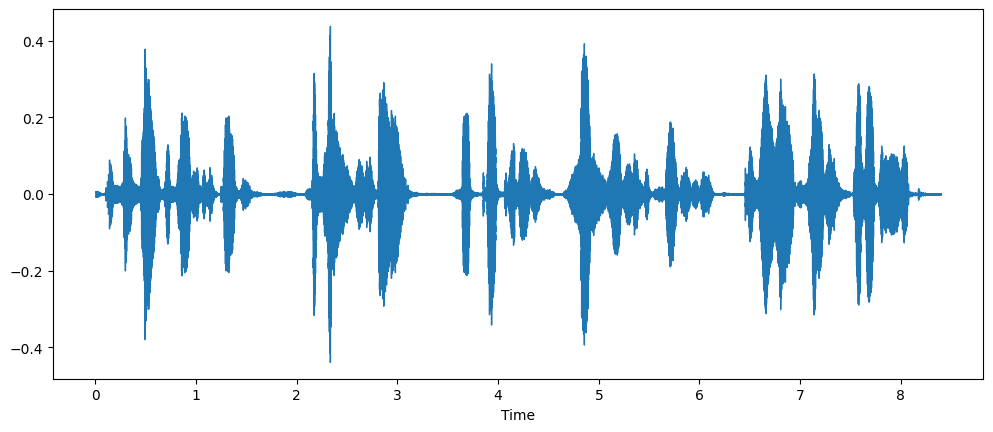

In [23]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = third_example["audio"]["array"]
sampling_rate = third_example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)


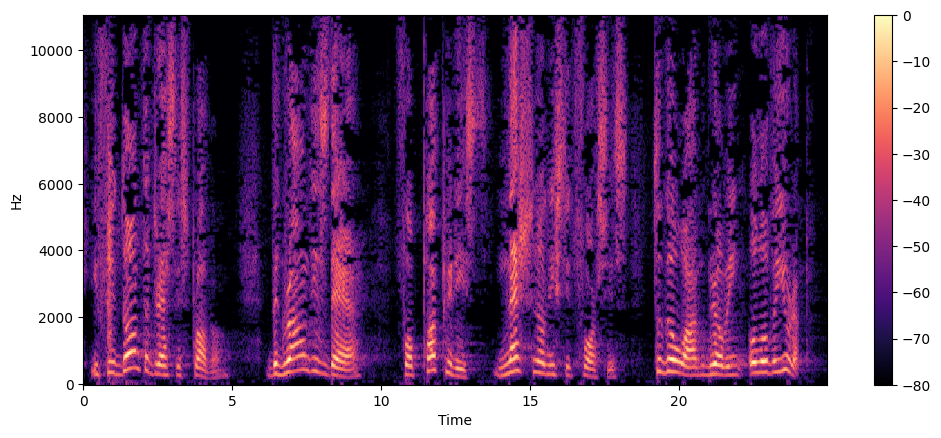

In [24]:
import numpy as np

D = librosa.stft(array,n_fft=500)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

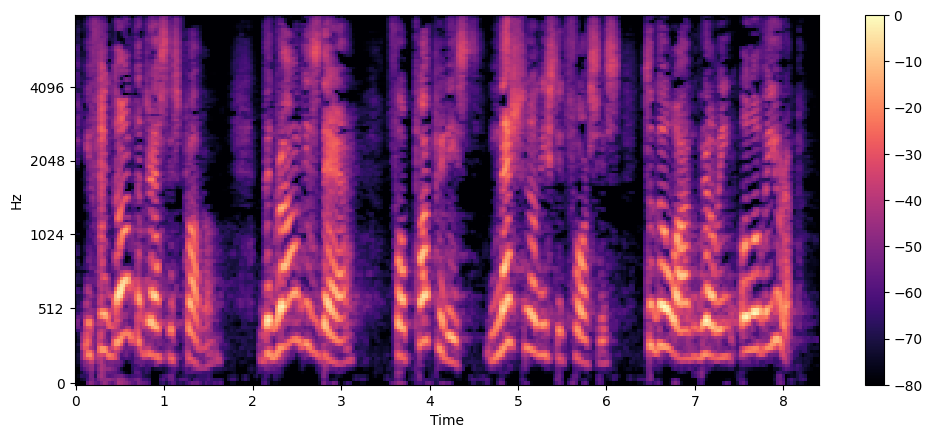

In [25]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()